In [2]:
# importing to allow to read files into google colab directly from drive!

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing necessary libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import keras
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, LSTM,BatchNormalization,TimeDistributed,Flatten,Bidirectional

In [4]:
# the name of file names to read from txt files

filename = ['L4_abhay_M_38_10.txt','L4_abhilash1_M_23_10.txt','L4_amrish_M_29_10.txt','L4_annu1_F_10_10.txt','L4_anuj1_M_13_10.txt','L4_avinash1_M_27_10.txt','L4_bhuvan1_M_13_10.txt','L4_chachiiiiiiiiiii1_F_35_10.txt','L4_champu_M_21_10.txt','L4_garima1_F_13_10.txt','L4_geetamami1_F_34_10.txt','L4_gordhan_M_45_10.txt','L4_Gunjan1_F_17_10.txt','L4_guzzrAunty1_F_48_10.txt','L4_joney1_M_31_10.txt','L4_kanchan1_F_12_10.txt','L4_kapil_M_21_10.txt','L4_kirti1_F_6_10.txt','L4_kusum1_F_48_10.txt','L4_lalit1_M_12_10.txt','L4_laras1_M_8_10.txt','L4_mahesh1_M_50_10.txt','L4_mannu1_M_13_10.txt','L4_manthan1_M_18_10.txt','L4_mohit1_M_10_10.txt','L4_monika1_F_24_10.txt','L4_moolchnd1_M_47_10.txt','L4_munish_M_42_10.txt','L4_nanaji1_M_63_10.txt','L4_naveen1_M_15_10.txt','L4_neeraj_M_28_10.txt','L4_nirmal_M_49_10.txt','L4_nishu1_M_12_10.txt','L4_omsingh_M_35_10.txt','L4_pawan1_M_23_10.txt','L4_prabhat1_M_25_10.txt','L4_prachi1_F_8_10.txt','L4_praveen1_M_28_10.txt','L4_priya1_F_7_10.txt','L4_pushpa1_F_37_10.txt','L4_radhe1_M_36_10.txt','L4_rajumama1_M_36_10.txt','L4_raj_M_28_10.txt','L4_ranu_M_22_10.txt','L4_rohit1_M_16_10.txt','L4_sachinn_M_38_10.txt','L4_sakshi1_F_19_10.txt','L4_santosh1_F_53_10.txt','L4_shelly_F_17_10.txt','L4_soniya1_F_25_10.txt','L4_sumit1_M_12_10.txt','L4_sunil_M_27_10.txt','L4_sunyana1_F_15_10.txt','L4_sushma1_F_18_10.txt','L4_swati1_F_13_10.txt','L4_tarun1_M_18_10.txt','L4_umesh1_M_20_10.txt','L4_vikas1_M_33_10.txt','L4_vinay1_M_11_10.txt','L4_yogesh_M_28_10.txt']
len(filename)

60

In [55]:
FILE_PATH = '/content/drive/MyDrive/ell319_termpaper/Untitled Folder/'
dataframes=pd.read_table(FILE_PATH+'L1_abhay_M_38_10.txt',' ',header=None)
dataframes[14] = 5
dataframes.insert(0,'0','_abhay_M_38_')
for i in range(1,60):
    for j in range(1,4):
        for k in range(1,4):
          # k =1

          # finding the filename from the for loop variables and filename list:
          f_ = filename[i]
          fr = f_[2:]
          ft = "L"+str(j)+fr
          w_ = f_[::-1]
          id = w_.find("_")
          idx = len(w_)-id
          w__ = ft[:idx]
          fn = w__+str(k)+".txt"
          fn.strip()

          # finding age from the txt file name
          pos = fn.find('M')
          if pos==-1:
              pos = fn.find('F')
          start_of_age = fn[(pos+2):]
          x_ = start_of_age.find('_')
          agestr = fn[(2+pos):(x_+pos+2)]
          y = int(agestr)

          df=pd.read_table(FILE_PATH+fn,' ',header=None)
          df.insert(0,'0',wq[2:])
          
          # creating a new column to store the classes corresponding ages
          if y<=10:
              df[14]=1
          elif y<=15:
              df[14]=2
          elif y<=23:
              df[14]=3
          elif y<=29:
              df[14]=4
          elif y<=38:
              df[14]=5
          else:
              df[14]=6
              
          dataframes = dataframes.append(df)

print(dataframes.shape)
dataframes.head(500)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


(136212, 16)


,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,_abhay_M_38_,4248.205128,4221.025641,4236.923077,4240.512821,4228.205128,4215.384615,4226.666667,4244.102564,4233.846154,4233.333333,4229.743590,4215.897436,4237.948718,4221.538462,5
1,_abhay_M_38_,4241.025641,4212.820513,4227.692308,4229.230769,4225.641026,4216.923077,4222.051282,4245.641026,4230.769231,4231.282051,4218.974359,4207.179487,4236.410256,4212.307692,5
2,_abhay_M_38_,4235.384615,4207.692308,4226.666667,4236.923077,4227.692308,4222.051282,4221.025641,4236.923077,4234.871795,4228.717949,4222.051282,4199.487179,4224.102564,4210.769231,5
3,_abhay_M_38_,4234.871795,4211.282051,4225.128205,4243.589744,4228.717949,4230.769231,4224.615385,4232.307692,4241.025641,4231.794872,4224.615385,4196.923077,4217.948718,4214.358974,5
4,_abhay_M_38_,4229.743590,4207.179487,4217.435897,4227.692308,4224.615385,4235.897436,4227.692308,4237.948718,4237.435897,4231.794872,4213.333333,4195.384615,4217.948718,4204.102564,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,_abhilash1_M_23_,4194.871795,4173.846154,4165.641026,4240.512821,4214.871795,4187.692308,4166.666667,4181.538462,4176.923077,4218.974359,4215.384615,4202.564103,4187.692308,4168.717949,3
220,_abhilash1_M_23_,4197.435897,4176.410256,4169.743590,4244.102564,4215.384615,4191.282051,4169.743590,4186.153846,4179.487179,4219.487179,4215.384615,4202.051282,4190.769231,4175.384615,3
221,_abhilash1_M_23_,4195.384615,4176.923077,4172.820513,4244.615385,4215.384615,4187.692308,4171.282051,4191.282051,4181.025641,4218.974359,4213.846154,4204.615385,4192.307692,4181.538462,3
222,_abhilash1_M_23_,4194.358974,4173.846154,4168.717949,4243.076923,4216.410256,4187.179487,4169.743590,4189.230769,4182.051282,4219.487179,4215.384615,4201.538462,4190.769231,4174.871795,3


In [56]:
data=np.array(dataframes)

In [57]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
data[:,1:15] = scl.fit_transform(data[:,1:15])

In [8]:

print(data.shape)
print(data)

(136212, 16)
[['_abhay_M_38_' 0.26239730184778803 0.10804101042455384 ...
  0.160991158200037 0.031379613085517656 5]
 ['_abhay_M_38_' 0.22210059674610677 0.05520276476158543 ...
  0.15029397451338258 -0.021688683977527497 5]
 ['_abhay_M_38_' 0.19043889707411846 0.022178861222232366 ...
  0.06471653283278804 -0.030533396321992107 5]
 ...
 ['_yogesh_M_28_' 0.11272382575582178 0.13776252682980278 ...
  0.02905926546587469 0.004845464553995079 4]
 ['_yogesh_M_28_' 0.21346558570365132 0.17078643036915586 ...
  0.0611508095726809 -0.0010510122586703237 4]
 ['_yogesh_M_28_' 0.1558988641298166 0.1113434039983215 ...
  -0.0030322786409315177 -0.0010510122586703237 4]]


In [58]:
# pick a large window size of 25 cycles
sequence_length = 50

# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    
    data_matrix = id_df[:,seq_cols]
    
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [59]:
sequence_cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

seq_gen = (list(gen_sequence(data[data[0:,0]==id], sequence_length, sequence_cols)) 
          for id in np.unique(data[0:,0]))

seq_array = np.concatenate(list(seq_gen))
print(seq_array.shape)
seq_array

(133212, 50, 15)


array([[[1.5759510778027923, 0.38388842420281394, 2.4315755366578333,
         ..., 2.5353467151795237, 1.1202915243788478, 3],
        [1.51306750493011, 0.15577647268677333, 2.332840485059468, ...,
         2.3446991383526683, 0.9653554983448049, 3],
        [1.4152486243918754, -0.10492289956662319, 2.175398107030713,
         ..., 1.9252744569414941, 0.7800398599436974, 3],
        ...,
        [-2.8538469138107705, -10.291750876246002, -3.5592404223823504,
         ..., -6.962080302763426, -5.095377319947221, 3],
        [-2.920224007912667, -10.415583075047955, -3.6339588430428145,
         ..., -6.974790147414595, -5.101453242420632, 3],
        [-2.9272110708082533, -10.366701947119195, -3.593931117874837,
         ..., -7.527668132604571, -4.919175562294221, 3]],

       [[1.51306750493011, 0.15577647268677333, 2.332840485059468, ...,
         2.3446991383526683, 0.9653554983448049, 3],
        [1.4152486243918754, -0.10492289956662319, 2.175398107030713,
         ..., 1.92527

In [60]:
from sklearn.utils import shuffle
seq_array = shuffle(seq_array)

In [62]:
train_final=seq_array[0:110000,:,0:14]
test_final=seq_array[110000:,:,0:14]
from sklearn import preprocessing
train_label=seq_array[0:110000,0,14]
test_label=seq_array[110000:,0,14]
train_label=train_label.reshape((train_label.shape[0],1))
train_label=train_label.astype('int')
test_label=test_label.astype('int')
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)

(110000, 50, 14)
(110000, 1)
(23212, 50, 14)
(23212,)


In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_label)
train_label = encoder.transform(train_label)
test_label = encoder.transform(test_label)
# convert integers to dummy variables (i.e. one hot encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from keras.utils import np_utils

train_label = np_utils.to_categorical(train_label)
# test_label = np_utils.to_categorical(test_label)

In [65]:
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)
print(train_label)
print(np.unique(test_label))

(110000, 50, 14)
(110000, 6)
(23212, 50, 14)
(23212,)
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[0 1 2 3 4 5]


In [66]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
# creating our model:

nb_features = train_final.shape[2]
nb_out = train_label.shape[1]

model = Sequential()

model.add(Bidirectional(LSTM( units=256,
         return_sequences=True),
         input_shape=(sequence_length, nb_features),
        ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(
         units=128,
         return_sequences=True))

model.add(BatchNormalization())
model.add(LSTM(
          units=64,
          return_sequences=False))

model.add(BatchNormalization())
model.add(Dense(units=32))
model.add(Dense(units=6, activation='softmax'))
tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 50, 512)          555008    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 50, 512)           0         
                                                                 
 batch_normalization_12 (Bat  (None, 50, 512)          2048      
 chNormalization)                                                
                                                                 
 lstm_13 (LSTM)              (None, 50, 128)           328192    
                                                                 
 batch_normalization_13 (Bat  (None, 50, 128)          512       
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
# fitting the model with training data

train_final = np.asarray(train_final).astype(np.float32)
test_final = np.asarray(test_final).astype(np.float32)
model.fit(train_final,train_label,validation_split=0.2,epochs=5, batch_size=32,verbose=1)

Epoch 1/5
2750/2750 [==============================] - 248s 90ms/step - loss: 0.9181 - accuracy: 0.6465 - val_loss: 0.6556 - val_accuracy: 0.7645
Epoch 2/5
2750/2750 [==============================] - 242s 88ms/step - loss: 0.3877 - accuracy: 0.8603 - val_loss: 0.1904 - val_accuracy: 0.9343
Epoch 3/5
2750/2750 [==============================] - 233s 85ms/step - loss: 0.1962 - accuracy: 0.9329 - val_loss: 0.0627 - val_accuracy: 0.9781
Epoch 4/5
2750/2750 [==============================] - 230s 84ms/step - loss: 0.1243 - accuracy: 0.9582 - val_loss: 0.0494 - val_accuracy: 0.9863
Epoch 5/5
2750/2750 [==============================] - 227s 82ms/step - loss: 0.0959 - accuracy: 0.9689 - val_loss: 0.0274 - val_accuracy: 0.9923


In [71]:
# printing confusion matrix and calculating accuracy of our model

test_final = np.asarray(test_final).astype(np.float32)
y_pred_test = np.argmax(model.predict(test_final),axis=1)

y_true_test = test_label

cm_test = confusion_matrix(y_true_test, y_pred_test)
print(cm_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true_test, y_pred_test)))
print('Micro Precision: {:.2f}'.format(precision_score(y_true_test, y_pred_test, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true_test, y_pred_test, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true_test, y_pred_test, average='micro')))

[[2358    6    4    2    5    2]
 [   3 4682   28    3    7    5]
 [   0    0 5109    5    2    2]
 [   9    3   21 3862    2   25]
 [   0    1   14   10 3533    3]
 [   0    9    2    0    2 3493]]

Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99



In [72]:
# defining function to plot confusion matrix plot as shown below
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('confusion_matrix_gender_alpha.png',bbox_inches='tight')

Confusion matrix, without normalization
[[2358    6    4    2    5    2]
 [   3 4682   28    3    7    5]
 [   0    0 5109    5    2    2]
 [   9    3   21 3862    2   25]
 [   0    1   14   10 3533    3]
 [   0    9    2    0    2 3493]]


<Figure size 432x288 with 0 Axes>

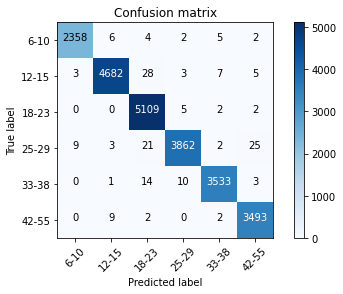

In [73]:
# Plot non-normalized confusion matrix
class_names=['6-10','12-15','18-23','25-29','33-38','42-55']
plt.figure()
plot_confusion_matrix(cm_test, classes=class_names,
                      title='Confusion matrix')
plt.show()